In [26]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from functools import reduce

In [105]:
ROOTDIR = "C:/Users/christopher/Documents/autosim"
SPOT = "3b_CO_BTN"
DATADIR = f"{ROOTDIR}/out/{SPOT}"
POTSIZE = 185

In [109]:
dfs = []
for board in os.listdir(DATADIR):
    datapath = f"{DATADIR}/{board}/data.csv"
    df = pd.read_csv(datapath)
    df["board"] = board
    cols = df.columns.tolist()
    newcols = cols[-1:] + cols[:-1]
    df = df[newcols]
    dfs.append(df)
data = pd.concat(dfs)
data = data.reset_index(drop=True)
data.drop("exploitability", axis=1)

,board,strategy,ev
0,2d3sAs,full,109.504
1,2d3sAs,37,108.976
2,2d3sAs,61,109.416
3,2d3sAs,92,109.554
4,2d3sAs,139,109.453
...,...,...,...
75,QsQdTc,full,131.777
76,QsQdTc,37,131.463
77,QsQdTc,61,131.272
78,QsQdTc,92,129.575


In [107]:
def strategy_as_perc(s):
    if not s.isnumeric():
        return s
    perc = int((int(s) / POTSIZE) * 100)
    return f"b{perc}"
data["strategy"] = data["strategy"].apply(strategy_as_perc)

In [108]:
boards = os.listdir(DATADIR)
print(boards)

['2d3sAs', '2d5s6s', '2d7sJs', '2s9dKc', '3d9sTs', '3s5dKs', '3s6d8c', '4d8sAs', '4s6dQs', '4s7s9d', '5s8dTc', '6s9sJd', '7dQsAs', '7sJdKc', 'AsAdTs', 'QsQdTc']


In [110]:
BOARD = "7sJdKc"

In [111]:
ALPHA = 0.2  # controls margin above and below the bars in the plot

idxs = data["board"] == BOARD
board_data = data[idxs]
min_ev = min(board_data["ev"])
max_ev = max(board_data["ev"])
gap = max_ev - min_ev

ylow = min_ev - ALPHA * gap
yhigh = max_ev + ALPHA * gap / 2

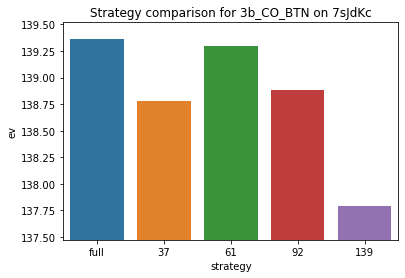

In [112]:
sns.barplot(x="strategy", y="ev", data=board_data)
plt.title(f"Strategy comparison for {SPOT} on {BOARD}")
plt.ylim([ylow, yhigh])
plt.show()